In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
fcn_subset = pd.read_csv('../results/fcn_subset.csv')
deformable_fcn_subset = pd.read_csv('../results/deformable_fcn_subset.csv')
inception_subset = pd.read_csv('../results/inceptiontime_subset.csv')

subset_results = pd.concat([fcn_subset, deformable_fcn_subset, inception_subset])
subset_results.shape

(60, 8)

In [9]:
grouped_subset_results = subset_results.groupby(['model', 'dataset']).mean()
grouped_subset_results

exp       acc        f1    recall  precision  \
model         dataset                                                     
deffcn        ArrowHead    2.0  0.856000  0.842944  0.866081   0.855813   
              BeetleFly    2.0  0.920000  0.915045  0.914667   0.920947   
              Car          2.0  0.926667  0.917877  0.917444   0.931936   
fcn           ArrowHead    2.0  0.846857  0.528839  0.506933   0.559356   
              BeetleFly    2.0  0.860000  0.830857  0.817667   0.861697   
              Car          2.0  0.913333  0.901345  0.904444   0.935714   
              Earthquakes  2.0  0.728058  0.495635  0.529084   0.511042   
              FaceAll      2.0  0.929586  0.799504  0.788200   0.817523   
              FordB        2.0  0.772593  0.763331  0.770396   0.775211   
inceptiontime ArrowHead    2.0  0.833143  0.832656  0.839978   0.832547   
              BeetleFly    2.0  0.900000  0.898990  0.900000   0.916667   
              Car          2.0  0.810000  0.806647  0.800405   0.820062   

                                  time  
model         dataset                   
deffcn        ArrowHead     234.196315  
              BeetleFly     105.369863  
              Car           303.864023  
fcn           ArrowHead      98.015452  
              BeetleFly      37.957213  
              Car            80.696707  
              Earthquakes   312.237920  
              FaceAll       864.414298  
              FordB        2909.754243  
inceptiontime ArrowHead     565.453082  
              BeetleFly     236.603868  
              Car           394.817131

(0.0, 1.2)

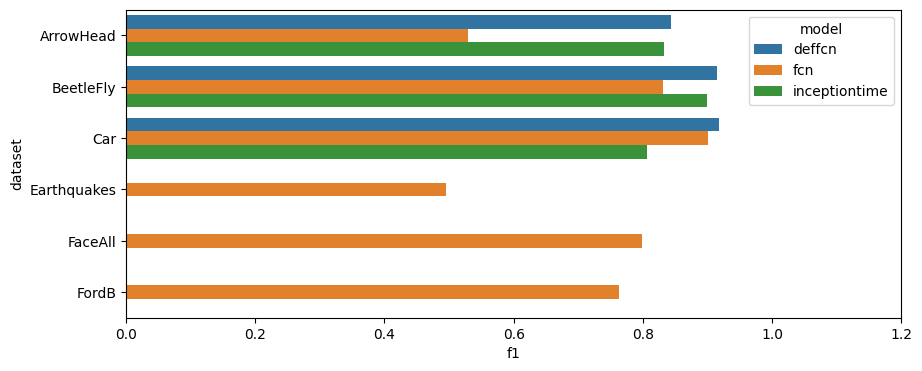

In [12]:
plt.figure(figsize=(10, 4))
sns.barplot(data=grouped_subset_results, x='f1', y='dataset', hue='model')
plt.xlim([0, 1.2])

(0.0, 1.2)

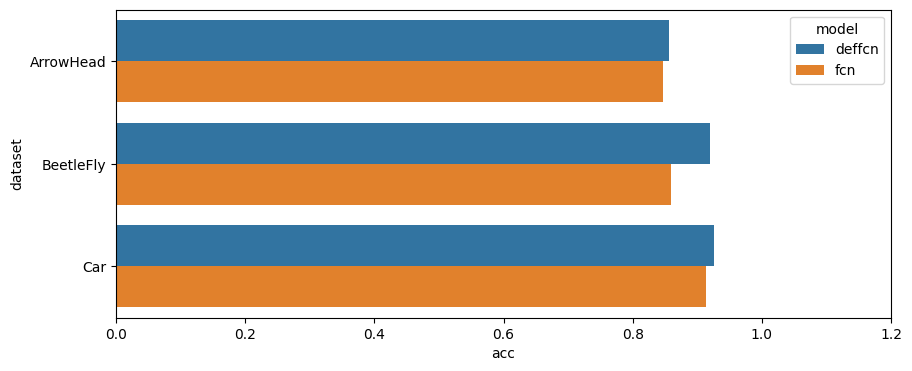

In [28]:
plt.figure(figsize=(10, 4))
sns.barplot(data=grouped_subset_results, x='acc', y='dataset', hue='model')
plt.xlim([0, 1.2])